In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
df = "../data/rawdata/winemag-data-130K-v2.csv"
df_one = pd.read_csv(df,index_col=0)
df_2 = df_one.dropna(subset=['points', 'price', 'country'])
df_2.shape

(120916, 13)

In [2]:
df_2.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem


In [3]:
df_2.describe()

,points,price
count,120916.000000,120916.000000
mean,88.421723,35.368644
std,3.044942,41.031052
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


In [4]:
df_2["variety"].value_counts(10)

Pinot Noir                   0.105735
Chardonnay                   0.091610
Cabernet Sauvignon           0.077608
Red Blend                    0.070016
Bordeaux-style Red Blend     0.044163
Riesling                     0.041112
Sauvignon Blanc              0.039532
Syrah                        0.033792
Rosé                         0.026969
Merlot                       0.025315
Zinfandel                    0.022396
Malbec                       0.021445
Sangiovese                   0.019658
Nebbiolo                     0.019278
Portuguese Red               0.018162
White Blend                  0.017922
Sparkling Blend              0.016764
Tempranillo                  0.014787
Rhône-style Red Blend        0.011611
Pinot Gris                   0.011479
Cabernet Franc               0.010784
Champagne Blend              0.010015
Grüner Veltliner             0.009469
Pinot Grigio                 0.008287
Portuguese White             0.008154
Viognier                     0.008146
Gewürztramin

In [11]:
bins_rating= [80,85,90,95,100]
wine_rating = ["80-84", "85 to 89", "90 to 94", "100"]


df_2["Rating"]= pd.cut(df_2["points"], bins_rating, labels= wine_rating, right=False)

df_2["variety"] = df_2["variety"].replace(
    {"Pinot Noir": "Red Wine", "Cabernet Sauvignon": "Red Wine", "Red Blend": "Red Wine", "Bordeaux-style Red Blend": "Red Wine", "Syrah": "Red Wine", "Merlot": "Red Wine", 'Zinfandel': "Red Wine", 
     'Malbec': "Red Wine", 'Nebbiolo': "Red Wine", 'Portuguese Red': 'Red Wine' , 'Tempranillo': 'Red Wine', 'Rhône-style Red Blend': 'Red Wine', 'Cabernet Franc': 'Red Wine', 'Gamay': 'Red Wine', 'Shiraz': 'Red Wine','Petite Sirah': 'Red Wine', 
    'Chardonnay': 'White Wine', 'Sauvignon Blanc': 'White Wine', 'Riesling': 'White Wine','Sangiovese': 'White Wine', 'White Blend': 'White Wine','Pinot Gris': 'White Wine', 'Grüner Veltliner': 'White Wine', 'Pinot Grigio': 'White Wine', 'Portuguese White': 'White Wine', 'Viognier': 'White Wine','Gewürztraminer': 'White Wine',
     'Bordeaux-style White Blend': 'White Wine', 'Grenache': 'Red Wine', 'Barbera': 'Red Wine', 'Sangiovese Gross': 'Red Wine', 'Tempranillo Blend': 'Red Wine', 'Carmenère': 'Red Wine', 'Chenin Blanc': 'White Wine', 'Port': 'Red Wine', 
     'Garganega': 'White Wine', 'Mourvèdre': 'Red Wine','Torrontés': 'White Wine', 'Petit Verdot': 'Red Wine','Verdejo': 'White Wine', 'Aglianico': 'Red Wine','Sauvignon': 'White Wine', 'Garnacha': 'Red Wine', 'Nero d Avola': 'Red Wine', 'Moscato': 'White Wine', 'Albariño': 'White Wine','Rhône-style White Blend': 'White Wine', 'Pinot Blanc': 'White White', 'Corvina, Rondinella, Molinara': 'Red Wine', 'Sparkling Blend': 'Sparkling Blen', 'Rose': 'Rose', 'Champagne Blend': 'Champagne'})
df_2.head()




C:\Users\mwhaw\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\mwhaw\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,Rating
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Red Wine,Quinta dos Avidagos,85 to 89
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),White Wine,Rainstorm,85 to 89
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,White Wine,St. Julian,85 to 89
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Red Wine,Sweet Cheeks,85 to 89
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,85 to 89


In [7]:
red_wine = df_2[df_2["variety"] == "Red Wine"].groupby([df_2["price"]])
red_wine_count = red_wine["variety"].count()
df_red = red_wine_count.sum()

white_wine = df_2[df_2["variety"] == "White Wine"].groupby([df_2["price"]])
white_wine_count = white_wine["variety"].count()
df_white = white_wine_count.sum()

sparkling_wine = df_2[df_2["variety"] == "Sparkling Blen"].groupby([df_2["price"]])
sparkling_wine_count = sparkling_wine["variety"].count()
df_sparkling = sparkling_wine_count.sum()

Rose_wine = df_2[df_2["variety"] == "Prosecco"].groupby([df_2["price"]])
Rose_wine_count = Rose_wine["variety"].count()
df_rose = Rose_wine_count.sum()

Champagne_wine = df_2[df_2["variety"]== "Champagne"].groupby([df_2["price"]])

Champagne_wine_count = Champagne_wine["variety"].count()
df_champagne = Champagne_wine_count.sum()

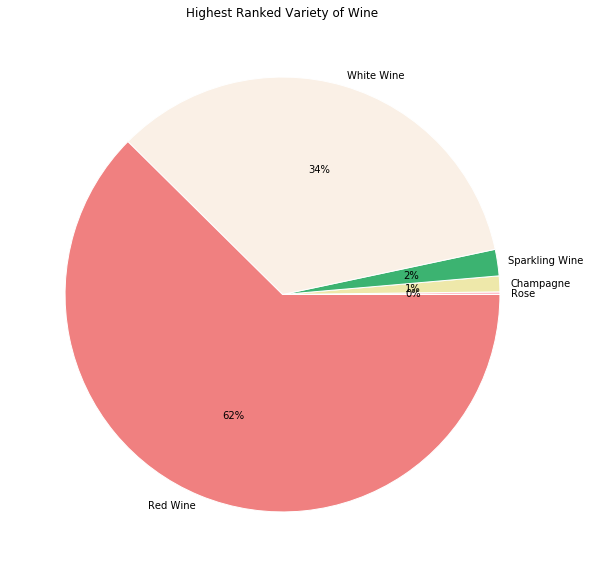

In [26]:

sizes = (df_red, df_white, df_sparkling, df_rose, df_champagne)

sizes = sorted(sizes)

labels = 'Rose','Champagne', 'Sparkling Wine', 'White Wine', 'Red Wine'
colors = [ 'Pink','palegoldenrod', 'mediumseagreen', 'linen', 'lightcoral']

fig = plt.figure(figsize=[10, 10])
ax = fig.add_subplot(111)

pie_wedge_collection = ax.pie(izes, colors=colors, labels=labels, autopct="%1.00f%%",labeldistance=1.05);

for pie_wedge in pie_wedge_collection[0]:
    pie_wedge.set_edgecolor('white')

ax.set_title("Highest Ranked Variety of Wine");




In [ ]:
#determine which variety has the highest points
df_taster_points = df_2.groupby(["taster_name"]).mean()
df_taster_points = df_taster_points.reset_index()
df_taster_points.head()


In [ ]:
plt.bar(df_taster_points["taster_name"], df_taster_points["price"], color='r')
plt.ylim([0, 50])
plt.xticks(rotation=90)
plt.show()

In [ ]:
df_variety = df_2.groupby(["country"]).mean()
df_variety = df_variety.reset_index()
df_variety.head()


In [ ]:
#l1= ax.bar(df_variety["country"], df_variety["points"], color='g')
fig, ax= plt.subplots(num=1,figsize=(10,5), dpi=80, facecolor='w', edgecolor='k')
l1= ax.bar(df_variety["country"], df_variety["points"], color='g')
plt.ylim([80,95])
plt.xticks(rotation=90, fontsize=5)
plt.xticks(size = 8)
plt.yticks(size = 8)
plt.xticks(rotation=90)
plt.xlabel("Country")
plt.ylabel("Average Points Scored per Country")
plt.title("Country vs. Price")
 